In [1]:
!pip install -U -q PyDrive

In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime, tzinfo, timezone
# import xlsxwriter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bokeh.plotting import figure
import plotly.graph_objs as go
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

In [3]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/1jIARgQsFtZFKhe-4SHSFnNl5diEoAdLQ/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

In [5]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('BFS-mf.csv')  

# Read data

In [39]:
df_category = pd.read_csv('BFS-mf.csv', skiprows=(1), nrows=22)
df_data_type = pd.read_csv('BFS-mf.csv', skiprows=27, nrows=12)
df_geo_level = pd.read_csv('BFS-mf.csv', skiprows=43, nrows=56)
df_time_period = pd.read_csv('BFS-mf.csv', skiprows=103, nrows=206)
df_val = pd.read_csv('BFS-mf.csv', skiprows=321, low_memory=False)

In [40]:
df_category.head()

,cat_idx,cat_code,cat_desc,cat_indent
0,1,TOTAL,Total for All NAICS,0
1,2,NAICS11,Agriculture,1
2,3,NAICS21,Mining,1
3,4,NAICS22,Utilities,1
4,5,NAICS23,Construction,1


In [77]:
df_category

,cat_idx,cat_code,cat_desc,cat_indent
0,1,TOTAL,Total for All NAICS,0
1,2,NAICS11,Agriculture,1
2,3,NAICS21,Mining,1
3,4,NAICS22,Utilities,1
4,5,NAICS23,Construction,1
5,6,NAICSMNF,Manufacturing,1
6,7,NAICS42,Wholesale Trade,1
7,8,NAICSRET,Retail Trade,1
8,9,NAICSTW,Transportation and Warehousing,1
9,10,NAICS51,Information,1


In [41]:
df_data_type.head()

,dt_idx,dt_code,dt_desc,dt_unit
0,1,BA_BA,Business Applications,UNITS
1,2,BA_CBA,Business Applications from Corporations,UNITS
2,3,BA_HBA,High-Propensity Business Applications,UNITS
3,4,BA_WBA,Business Applications with Planned Wages,UNITS
4,5,BF_BF4Q,Business Formations within Four Quarters,UNITS


In [42]:
df_geo_level.head(6)

,geo_idx,geo_code,geo_desc
0,1,US,U.S. Total
1,2,NO,Northeast
2,3,MW,Midwest
3,4,SO,South
4,5,WE,West
5,6,AK,Alaska


In [43]:
df_time_period.head()

,per_idx,per_name
0,1,Jul2004
1,2,Aug2004
2,3,Sep2004
3,4,Oct2004
4,5,Nov2004


In [44]:
df_time_period.tail()

,per_idx,per_name
201,202,Apr2021
202,203,May2021
203,204,Jun2021
204,205,Jul2021
205,206,Aug2021


In [45]:
df_val.head(1)

,per_idx,cat_idx,dt_idx,geo_idx,is_adj,val
0,1,1,1,1,0,166448


# Combine all data sets

In [46]:
df = (df_val
          .merge(df_category, on = ['cat_idx'], how ='left')
          .merge(df_data_type,  on = ['dt_idx'], how ='left')
          .merge(df_geo_level,  on = ['geo_idx'], how ='left')
          .merge(df_time_period,  on = ['per_idx'], how ='left')
    )

In [47]:
df.head()

,per_idx,cat_idx,dt_idx,geo_idx,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
0,1,1,1,1,0,166448,TOTAL,Total for All NAICS,0,BA_BA,Business Applications,UNITS,US,U.S. Total,Jul2004
1,1,2,1,1,0,1886,NAICS11,Agriculture,1,BA_BA,Business Applications,UNITS,US,U.S. Total,Jul2004
2,1,3,1,1,0,384,NAICS21,Mining,1,BA_BA,Business Applications,UNITS,US,U.S. Total,Jul2004
3,1,4,1,1,0,135,NAICS22,Utilities,1,BA_BA,Business Applications,UNITS,US,U.S. Total,Jul2004
4,1,5,1,1,0,22350,NAICS23,Construction,1,BA_BA,Business Applications,UNITS,US,U.S. Total,Jul2004


In [76]:
df.tail()

,per_idx,cat_idx,dt_idx,geo_idx,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
per_name,,,,,,,,,,,,,,,
2021-08-01,206,1,10,54,1,100.0,TOTAL,Total for All NAICS,0,BF_SBF8Q,Spliced Business Formations within Eight Quarters,UNITS,WV,West Virginia,2021-08-01
2021-08-01,206,1,10,55,0,402.0,TOTAL,Total for All NAICS,0,BF_SBF8Q,Spliced Business Formations within Eight Quarters,UNITS,WI,Wisconsin,2021-08-01
2021-08-01,206,1,10,55,1,483.0,TOTAL,Total for All NAICS,0,BF_SBF8Q,Spliced Business Formations within Eight Quarters,UNITS,WI,Wisconsin,2021-08-01
2021-08-01,206,1,10,56,0,155.0,TOTAL,Total for All NAICS,0,BF_SBF8Q,Spliced Business Formations within Eight Quarters,UNITS,WY,Wyoming,2021-08-01
2021-08-01,206,1,10,56,1,201.0,TOTAL,Total for All NAICS,0,BF_SBF8Q,Spliced Business Formations within Eight Quarters,UNITS,WY,Wyoming,2021-08-01


In [48]:
df.shape

(321632, 15)

In [49]:
df.dtypes

per_idx        int64
cat_idx        int64
dt_idx         int64
geo_idx        int64
is_adj         int64
val           object
cat_code      object
cat_desc      object
cat_indent     int64
dt_code       object
dt_desc       object
dt_unit       object
geo_code      object
geo_desc      object
per_name      object
dtype: object

**NOTE:** Abbreviation used in the dataset -- df <br /><br />
NA = Not Applicable<br /><br />



S = Estimate does not meet publication standards because concerns about the estimate's quality. Unpublished estimates derived from this table by subtraction are subject to this same limitation and should not be attributed to the U.S. Census Bureau.  <br /><br />



D = Denotes an estimate withheld to avoid disclosing data of individual establishments; data are included in higher-level totals. 

In [52]:
df.replace(['NA', 'S', 'D'], np.nan, inplace =True)
df['val'] = df['val'].astype(float)
df['per_name'] =pd.to_datetime(df['per_name'], format = "%b%Y")
df.set_index('per_name', drop=False, inplace=True)

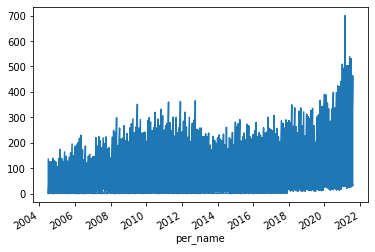

In [53]:
df.loc[df['cat_desc']=='Utilities', 'val'].plot()

Total for All NAICS


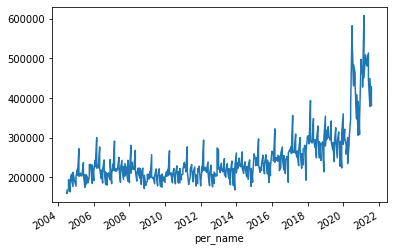

Agriculture


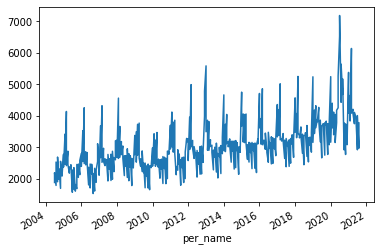

Mining


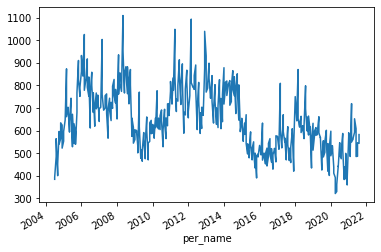

Utilities


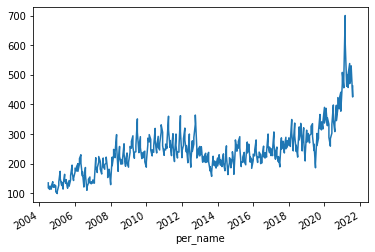

Construction


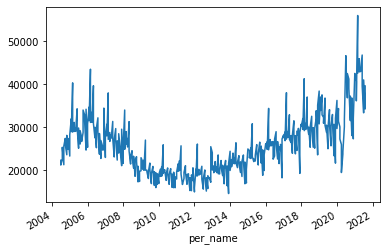

Manufacturing


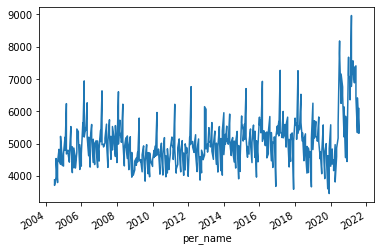

Wholesale Trade


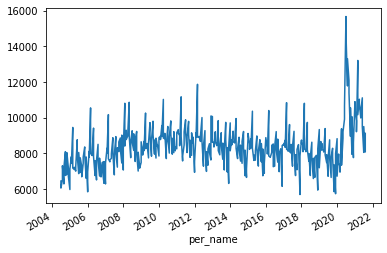

Retail Trade


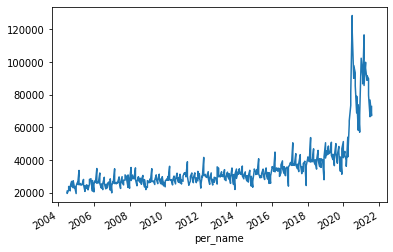

Transportation and Warehousing


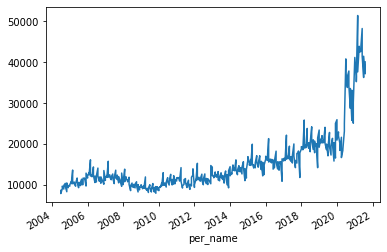

Information


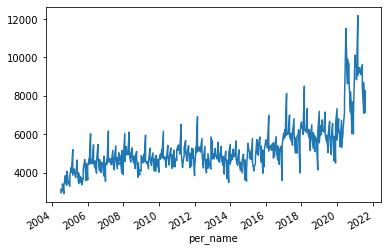

Finance and Insurance


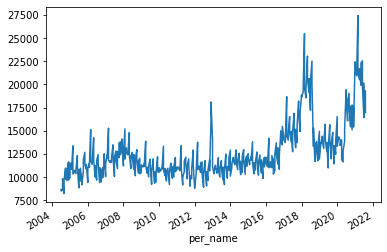

Real Estate


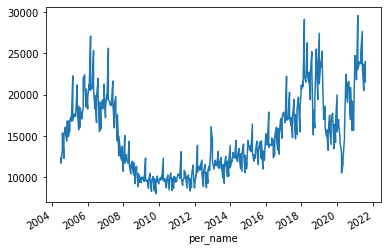

Professional Services


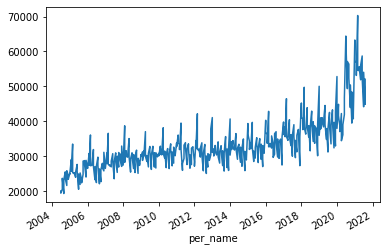

Management of Companies


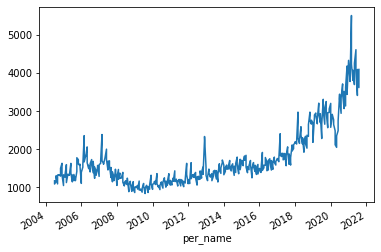

Administrative and Support


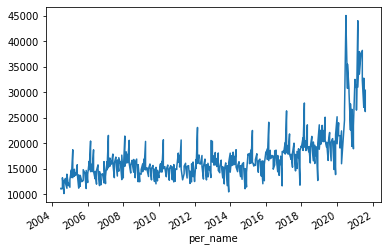

Educational Services


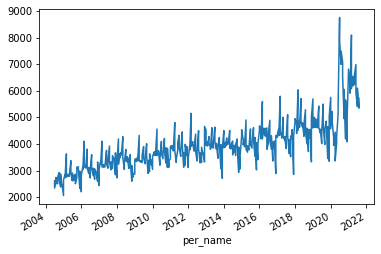

Health Care and Social Assistance


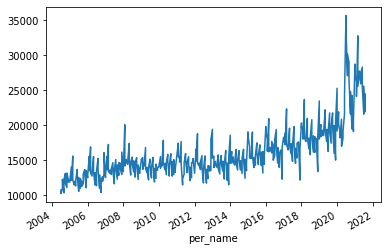

Arts and Entertainment


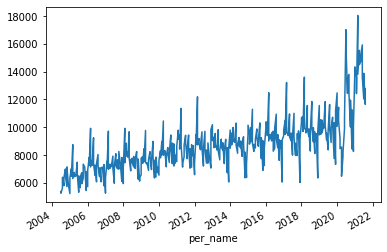

Accommodation and Food Services


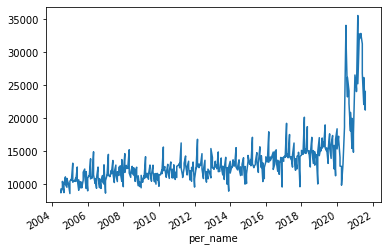

Other Services


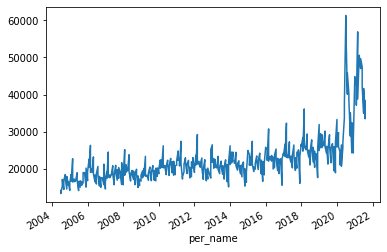

No NAICS Assigned


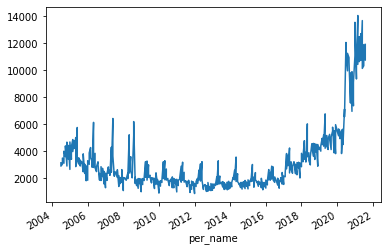

In [78]:
for category in df.cat_desc.unique():  
    print(category)
    df.loc[(df['cat_desc']== category) & (df['geo_desc']=='U.S. Total') & (df['dt_code']=='BA_BA') , 'val'].plot()
    plt.show()

In [71]:
df.cat_desc.unique()

array(['Total for All NAICS', 'Agriculture', 'Mining', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate', 'Professional Services',
       'Management of Companies', 'Administrative and Support',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts and Entertainment', 'Accommodation and Food Services',
       'Other Services', 'No NAICS Assigned'], dtype=object)

In [75]:
df.dt_desc.unique()

array(['Business Applications', 'Business Applications from Corporations',
       'High-Propensity Business Applications',
       'Business Applications with Planned Wages',
       'Business Formations within Four Quarters',
       'Business Formations within Eight Quarters',
       'Projected Business Formations within Four Quarters',
       'Projected Business Formations within Eight Quarters',
       'Spliced Business Formations within Four Quarters',
       'Spliced Business Formations within Eight Quarters',
       'Average Duration (in Quarters) from Business Application to Formation within Four Quarters',
       'Average Duration (in Quarters) from Business Application to Formation within Eight Quarters'],
      dtype=object)